In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sns
import ptitprince as pt

In [6]:
df= pd.read_csv("scenes_data.tsv", sep='\t')

In [7]:
df

,onset,duration,onset_frame,episode,scene_number,global_scene_number
0,0.000,17.986,1,friends_s01e01a,1,1
1,17.986,4.705,540,friends_s01e01a,2,2
2,22.691,4.238,681,friends_s01e01a,3,3
3,26.928,0.868,808,friends_s01e01a,4,4
4,27.796,2.269,834,friends_s01e01a,5,5
...,...,...,...,...,...,...
47654,648.282,11.646,19429,friends_s06e24b,154,47655
47655,659.927,6.407,19778,friends_s06e24b,155,47656
47656,666.334,6.407,19970,friends_s06e24b,156,47657
47657,672.741,6.574,20162,friends_s06e24b,157,47658


In [9]:
df["episode_short"] = df["episode"].str.extract(r'(s\d+e\d+)', expand=False).str.upper()
mean_duration = df.groupby("episode_short", as_index=False)["duration"].mean()


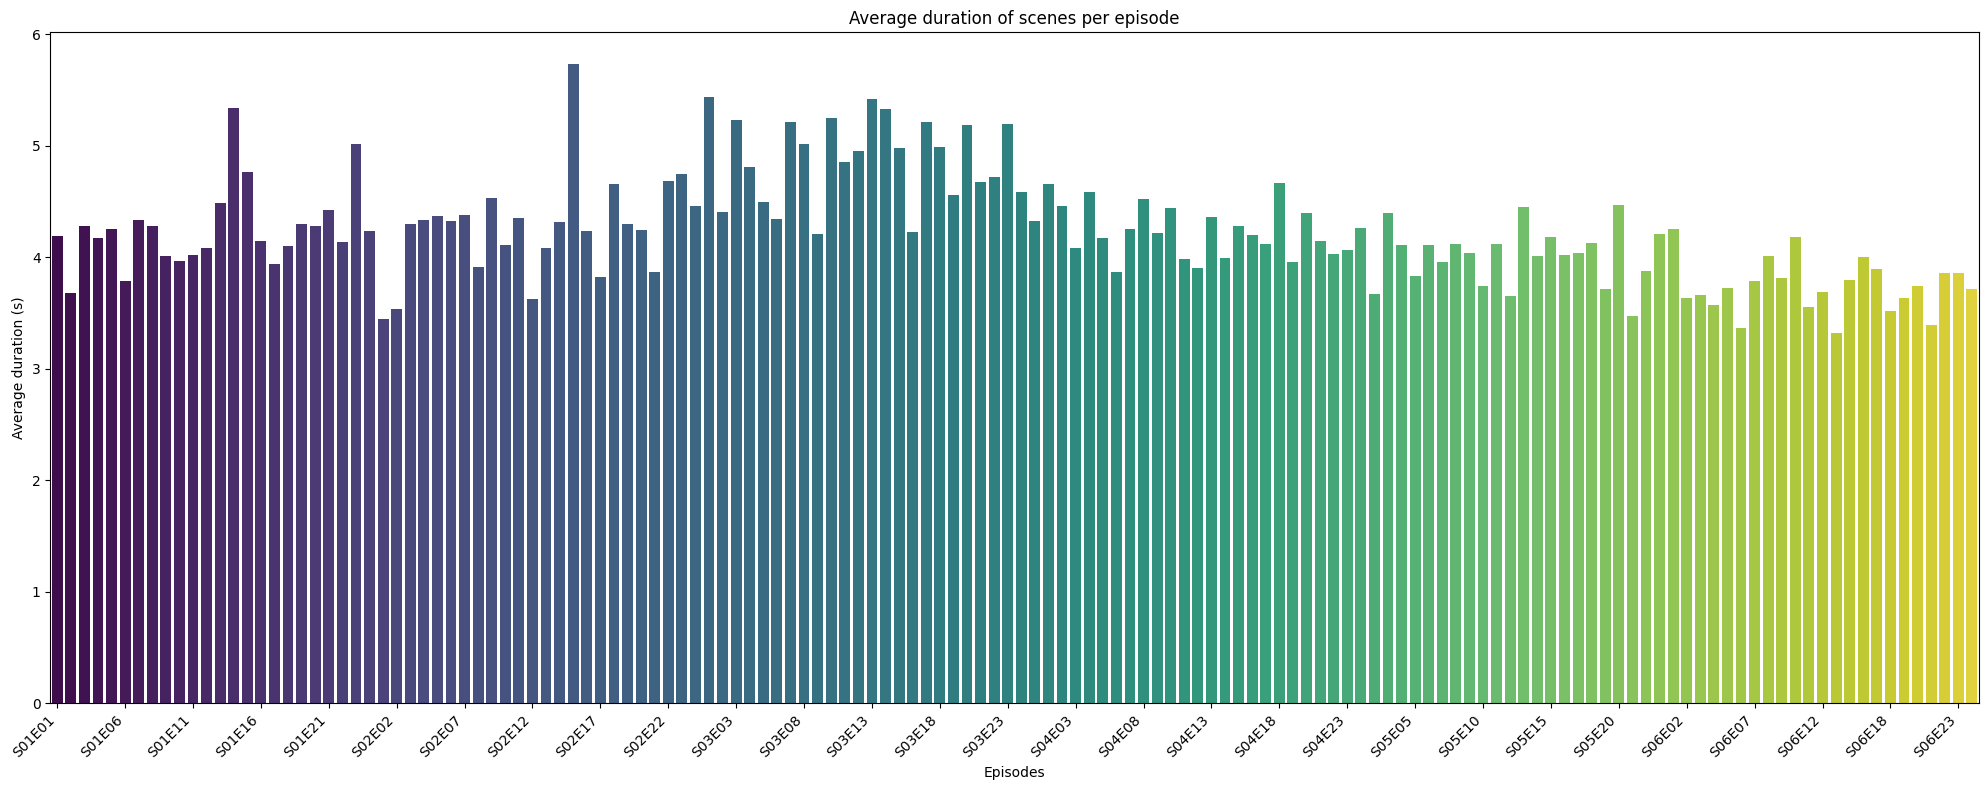

In [11]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=mean_duration, x="episode_short", y="duration", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Average duration of scenes per episode")
plt.ylabel("Average duration (s)")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()


In [15]:

scene_count = df.groupby("episode_short")["scene_number"].count().reset_index(name="num_scenes")

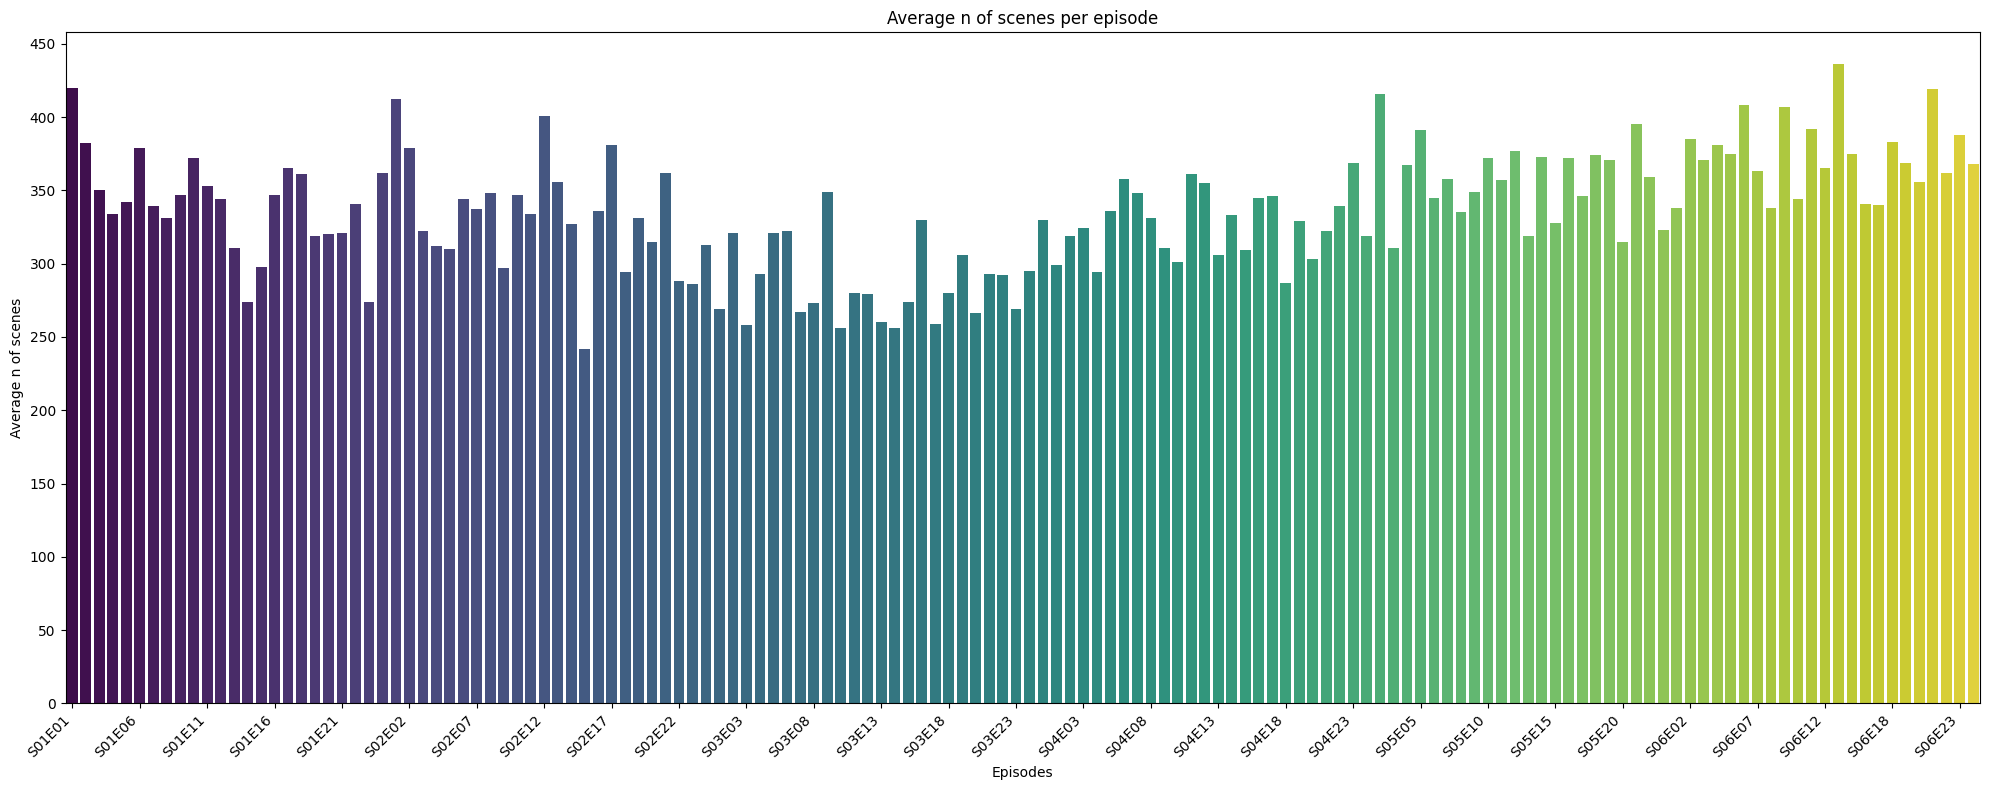

In [19]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=scene_count, x="episode_short", y="num_scenes", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticks(range(0, 500, 50)) 
plt.title("Average n of scenes per episode")
plt.ylabel("Average n of scenes")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()

In [20]:
episode_durations = df.groupby("episode_short")["duration"].sum().reset_index(name="episode_duration")

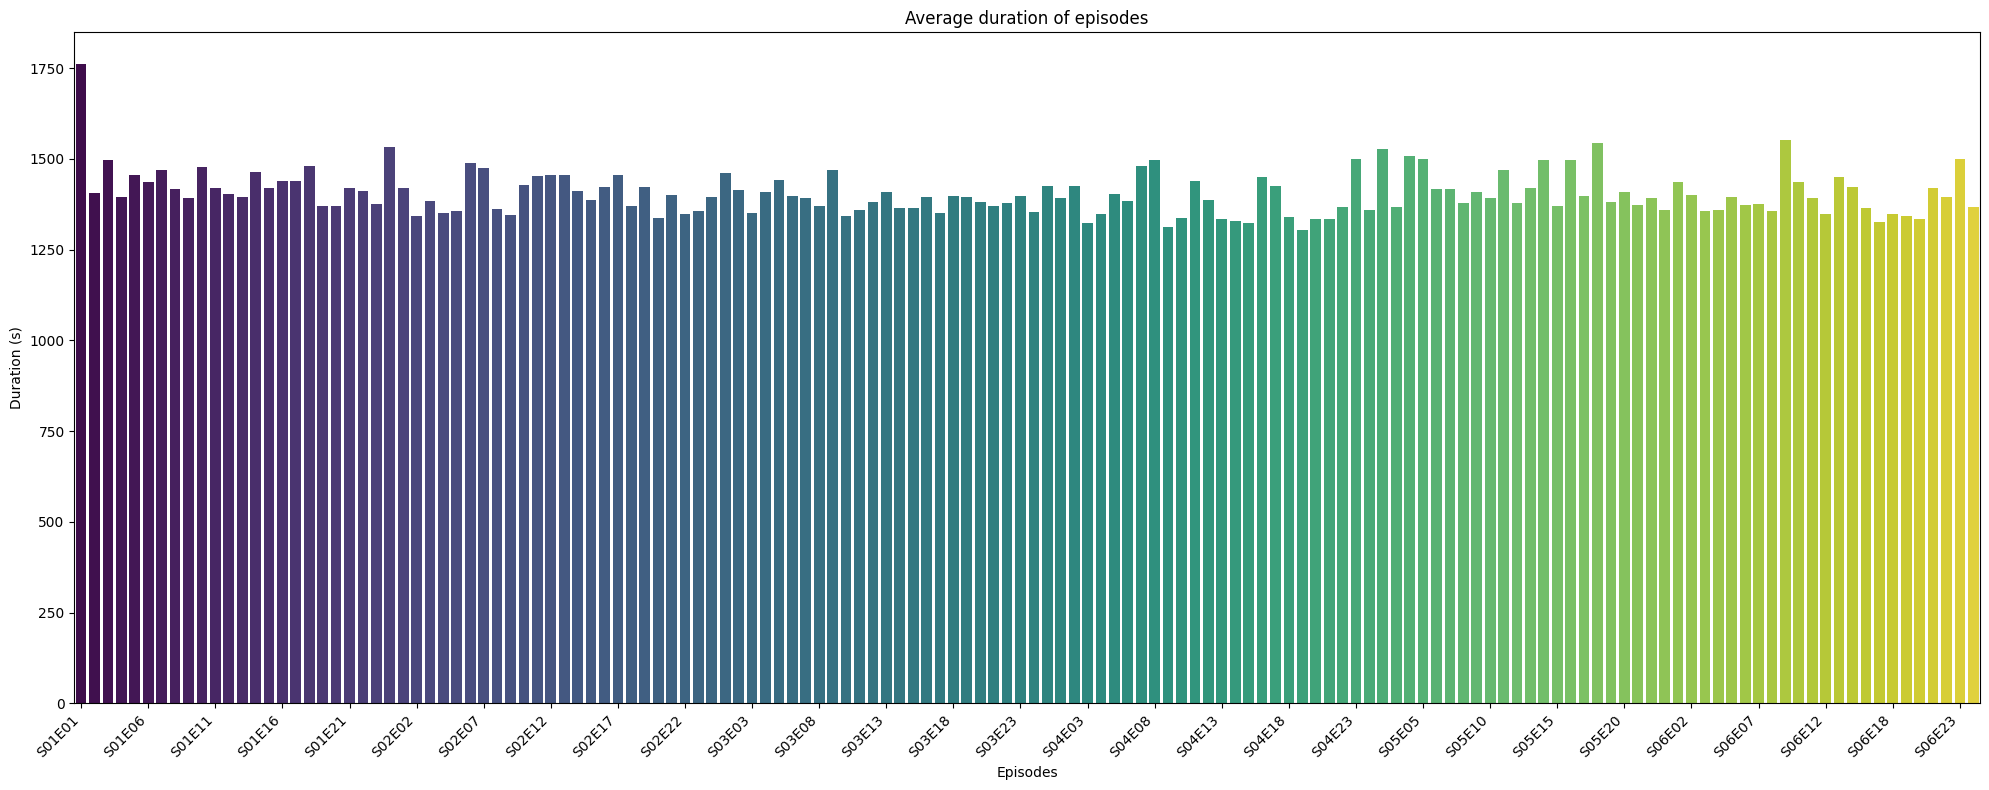

In [22]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=episode_durations, x="episode_short", y="episode_duration", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Average duration of episodes")
plt.ylabel("Duration (s)")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()
